In [6]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-03-29 13:30:16--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   109MB/s    in 1.8s    

2021-03-29 13:30:18 (109 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-03-29 13:30:18--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 74.125.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/t

In [7]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [8]:
# Creating a full path for each category
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

# Checking the number of images present inside a directory with respect to their category
print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

# Printing the first 10 image path of each category
rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock05ck01-073.png', 'rock04-046.png', 'rock05ck01-068.png', 'rock03-106.png', 'rock04-064.png', 'rock04-089.png', 'rock07-k03-114.png', 'rock01-045.png', 'rock04-019.png', 'rock03-003.png']
['paper04-049.png', 'paper04-006.png', 'paper02-093.png', 'paper07-004.png', 'paper05-002.png', 'paper03-068.png', 'paper06-090.png', 'paper02-027.png', 'paper06-103.png', 'paper04-045.png']
['scissors04-092.png', 'testscissors03-095.png', 'scissors02-119.png', 'scissors04-110.png', 'testscissors01-000.png', 'testscissors03-010.png', 'testscissors01-080.png', 'scissors01-017.png', 'testscissors02-060.png', 'scissors01-081.png']


# Image visualization

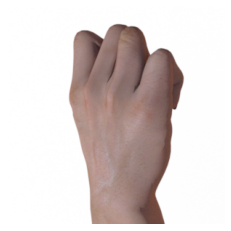

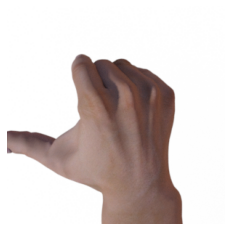

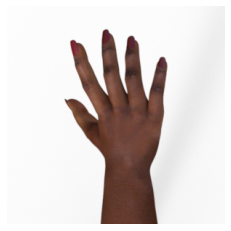

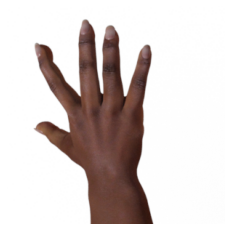

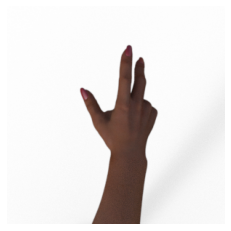

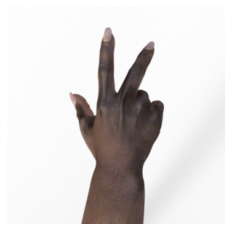

In [11]:
# importing tools for visualization
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Creating a list of path for each category
rock_img=[os.path.join(rock_dir,fname) for fname in rock_files[4:6]]
paper_img=[os.path.join(paper_dir,fname) for fname in paper_files[4:6]]
scissor_img=[os.path.join(scissors_dir,fname) for fname in scissors_files[4:6]]

# creating only one list by summing all the category path
full_img=rock_img+paper_img+scissor_img

# Visualising each images
for img_path in full_img:
  
  img=mpimg.imread(img_path)
  plt.imshow(img)
  
  plt.axis('off')
  plt.show()


# Preparation for CNN Model

## Importing tools

In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## Data Preprocessing

### Train Dataset

In [13]:
# Using image augmentation method to create many more duplicate images
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,horizontal_flip=True,zoom_range=0.2,fill_mode='nearest')
train_gen=train_datagen.flow_from_directory('/tmp/rps',target_size=(150,150),batch_size=16,class_mode='categorical')

Found 2520 images belonging to 3 classes.


### Validation Dataset

In [15]:

val_datagen=ImageDataGenerator(rescale=1./255)
val_gen=val_datagen.flow_from_directory('/tmp/rps-test-set',target_size=(150,150),batch_size=8,class_mode='categorical')

Found 372 images belonging to 3 classes.


## Preparing model

### Layers

In [16]:
cnn=tf.keras.models.Sequential()

# First Convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2,strides=2))

# Second Convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2,strides=2))

# Third Convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2,strides=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Hidden layer
cnn.add(tf.keras.layers.Dense(units=1024,activation='relu'))

# Droping the neuron or weight
cnn.add(tf.keras.layers.Dropout(0.2))

#Output layer
cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))




### Compiling the layers

In [17]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

## Creating a callback class

In [19]:
class myCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.98):
      print('\n Accuracy is more than 98% hence cancelling')
      self.model.stop_training=True

In [20]:
callbacks=myCallbacks()

## Training the model

In [21]:
history=cnn.fit(train_gen,validation_data=val_gen,validation_steps=3,callbacks=[callbacks],verbose=1,epochs=500)

Epoch 1/500
158/158 [==============================] - 53s 149ms/step - loss: 1.0714 - accuracy: 0.4376 - val_loss: 0.4519 - val_accuracy: 0.8750
Epoch 2/500
158/158 [==============================] - 23s 147ms/step - loss: 0.5682 - accuracy: 0.7441 - val_loss: 0.3692 - val_accuracy: 0.8333
Epoch 3/500
158/158 [==============================] - 23s 146ms/step - loss: 0.3774 - accuracy: 0.8546 - val_loss: 0.1455 - val_accuracy: 0.9583
Epoch 4/500
158/158 [==============================] - 23s 146ms/step - loss: 0.2232 - accuracy: 0.9287 - val_loss: 0.1480 - val_accuracy: 0.9583
Epoch 5/500
158/158 [==============================] - 23s 146ms/step - loss: 0.2021 - accuracy: 0.9293 - val_loss: 0.1617 - val_accuracy: 0.9583
Epoch 6/500
158/158 [==============================] - 23s 146ms/step - loss: 0.1567 - accuracy: 0.9511 - val_loss: 0.0627 - val_accuracy: 1.0000
Epoch 7/500
158/158 [==============================] - 23s 146ms/step - loss: 0.1274 - accuracy: 0.9553 - val_loss: 0.2321 -

## Visualizing the Performance of a model

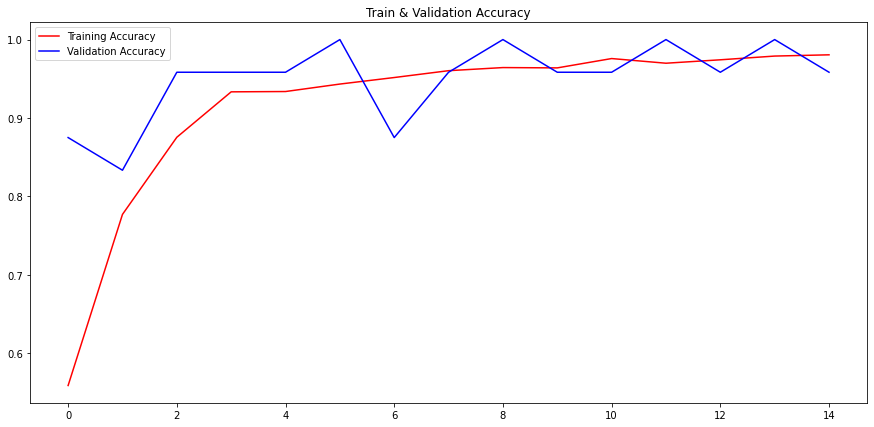

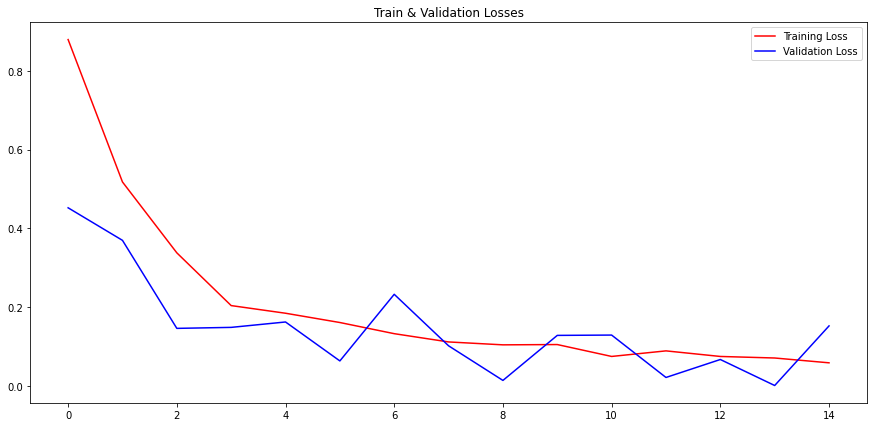

In [22]:
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
train_loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(train_acc))

# Accurcay of model
plt.figure(figsize=(15,7))
plt.plot(epochs,train_acc,c='red',label='Training Accuracy')
plt.plot(epochs,val_acc,c='blue',label='Validation Accuracy')
plt.title('Train & Validation Accuracy')
plt.legend();

plt.figure(figsize=(15,7))

# Loss of model
plt.plot(epochs,train_loss,c='red',label='Training Loss')
plt.plot(epochs,val_loss,c='blue',label='Validation Loss')
plt.title('Train & Validation Losses')
plt.legend(); 

## Saving Model

In [24]:
cnn.save('Rock_Paper_scissor.h5')

# Predicting the output based on the image

In [25]:
from google.colab import files
from keras.preprocessing import image

## Checking the indices

In [26]:
train_gen.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [32]:
file_path=input('Enter a file path:\n')
test_img=image.load_img(file_path,target_size=(150,150))
test_img=image.img_to_array(test_img)
test_img=np.expand_dims(test_img,axis=0)
result=cnn.predict(test_img)
# print(result)
if result[0][0]==1:
  print('Paper')
elif result[0][1]==1:
  print('Rock')
else:
  print('Scissors')

Enter a file path:
/content/young-male-palm-hand-gesture-left-concept-rock-paper-scissors-game-isolated-white-background-118950807.jpg
[[1. 0. 0.]]
Paper
